# Import Libraries

In [0]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

# Import Data

In [5]:
import h5py
# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/Colab Notebooks/A_Q3/SVHN_grey.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (63733, 32, 32, 1) (63733, 10)
Validation set (9524, 32, 32, 1) (9524, 10)
Test set (26032, 32, 32, 1) (26032, 10)


Plot Images

In [0]:
def plot_images(images, nrows, ncols, cls_true, cls_pred=None):
    """ Helper function for plotting nrows * ncols images
    """
    fig, axes = plt.subplots(nrows, ncols, figsize=(16, 2*nrows))
    for i, ax in enumerate(axes.flat): 
        # Pretty string with actual label
        true_number = ''.join(str(x) for x in cls_true[i] if x != 10)
        if cls_pred is None:
            title = "Label: {0}".format(true_number)
        else:
            # Pretty string with predicted label
            pred_number = ''.join(str(x) for x in cls_pred[i] if x != 10)
            title = "Label: {0}, Pred: {1}".format(true_number, pred_number)  
            
        if images[i].shape == (32, 32, 3):
            print(1)
            ax.imshow(images[i])
        else:
            ax.imshow(images[:,:,:,i], cmap="gray")
#             ax.imshow(images[i])
        ax.set_title(title)   
        ax.set_xticks([]); ax.set_yticks([])

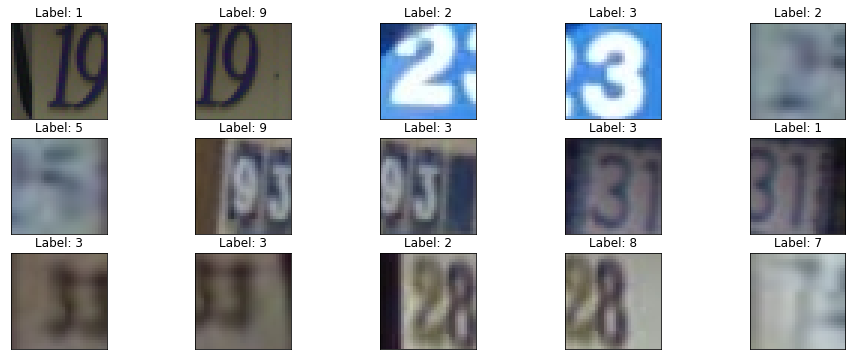

In [0]:
# Display images from the training set
plot_images(train_data, 3, 5, train_labels)

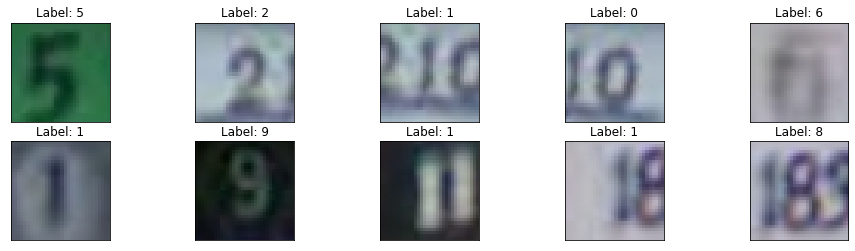

In [0]:
# Display images from the training set
plot_images(test_data, 2, 5, test_labels)

In [0]:
input_shape = (32,32,1)
nClasses = 10

# Create Model

In [0]:
def createSubModel(n=1, dropout_= True, drop=0.25):
  model = Sequential()

  if n==1:
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if dropout_ == True:
      model.add(Dropout(drop))

  # The Second two layers with 32, 64 filters of window size 3x3
  if n==2:
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if dropout_ == True:
      model.add(Dropout(drop))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if dropout_ == True:
      model.add(Dropout(drop))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(nClasses, activation='softmax'))
    
  return model

In [0]:
subModel1 = createSubModel(1, dropout_= False)
subModel2 = createSubModel(1, dropout_= True)
subModel3 = createSubModel(2, dropout_= False)
subModel4 = createSubModel(2, dropout_= True)
subModel5 = createSubModel(2, dropout_= True, drop=0.5)
subModel6 = createSubModel(2, dropout_= True, drop=0.75)

In [9]:
batch_size = 1024
epochs = 100
subModel1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
subModel2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
subModel3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
subModel4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
subModel5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
subModel6.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

print("Summary of SubModel1:")
subModel1.summary()
print("Summary of SubModel2:")
subModel2.summary()
print("Summary of SubModel3:")
subModel3.summary()
print("Summary of SubModel4:")
subModel4.summary()
print("Summary of SubModel5:")
subModel5.summary()
print("Summary of SubModel6:")
subModel6.summary()

Summary of SubModel1:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3686912   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None

In [0]:
datagen = ImageDataGenerator(
#         zoom_range=0.2, # randomly zoom into images
        rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [0]:
history1 = subModel1.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
subModel1.evaluate(X_test, y_test)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
63/63 [==============================] - 19s 306ms/step - loss: 2.3550 - accuracy: 0.2164 - val_loss: 1.6669 - val_accuracy: 0.4974
Epoch 2/100
63/63 [==============================] - 19s 305ms/step - loss: 1.7442 - accuracy: 0.4191 - val_loss: 1.1312 - val_accuracy: 0.6737
Epoch 3/100
63/63 [==============================] - 19s 302ms/step - loss: 1.4366 - accuracy: 0.5355 - val_loss: 0.9038 - val_accuracy: 0.7599
Epoch 4/100
63/63 [==============================] - 19s 306ms/step - loss: 1.2364 - accuracy: 0.6040 - val_loss: 0.8748 - val_accuracy: 0.7435
Epoch 5/100
63/63 [==============================] - 19s 302ms/step - loss: 1.1026 - accuracy: 0.6459 - val_loss: 0.6502 - val_accuracy: 0.8155
Epoch 6/100
63/63 [==============================] - 19s 306ms/step - loss: 1.0167 - accuracy: 0.6775 - val_loss: 0.6698 - val_accuracy: 0.8003
Epoch 7/100
63/63 [==============================] - 19s 296

[0.29921597242355347, 0.9202520251274109]

In [0]:
history2 = subModel2.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
subModel2.evaluate(X_test, y_test)

Epoch 1/100
63/63 [==============================] - 20s 311ms/step - loss: 2.2239 - accuracy: 0.2300 - val_loss: 1.6963 - val_accuracy: 0.4898
Epoch 2/100
63/63 [==============================] - 19s 309ms/step - loss: 1.7033 - accuracy: 0.4354 - val_loss: 1.1250 - val_accuracy: 0.6827
Epoch 3/100
63/63 [==============================] - 19s 305ms/step - loss: 1.4357 - accuracy: 0.5332 - val_loss: 0.9738 - val_accuracy: 0.7354
Epoch 4/100
63/63 [==============================] - 19s 306ms/step - loss: 1.2419 - accuracy: 0.6016 - val_loss: 0.8648 - val_accuracy: 0.7203
Epoch 5/100
63/63 [==============================] - 19s 306ms/step - loss: 1.1212 - accuracy: 0.6378 - val_loss: 0.6260 - val_accuracy: 0.8187
Epoch 6/100
63/63 [==============================] - 19s 301ms/step - loss: 1.0283 - accuracy: 0.6720 - val_loss: 0.6462 - val_accuracy: 0.8042
Epoch 7/100
63/63 [==============================] - 19s 303ms/step - loss: 0.9632 - accuracy: 0.6914 - val_loss: 0.6172 - val_accuracy:

[0.2785891890525818, 0.9262062311172485]

# Comparison of Model Accuracy without and with Dropout

Text(0.5, 1.0, 'Accuracy Curves')

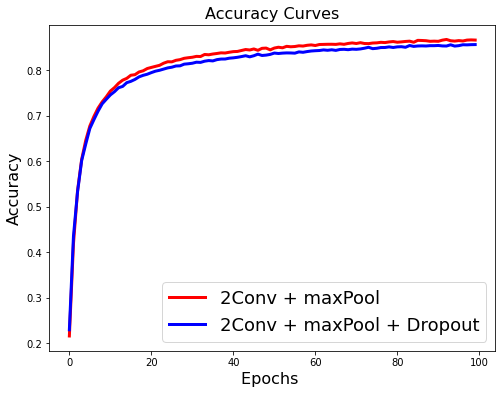

In [0]:
plt.figure(figsize=[8,6])
plt.plot(history1.history['accuracy'],'r',linewidth=3.0)
plt.plot(history2.history['accuracy'],'b',linewidth=3.0)
plt.legend(['2Conv + maxPool', '2Conv + maxPool + Dropout'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

The Accuracy of Model decreased when used Dropout Operation

Text(0.5, 1.0, 'Loss Curves')

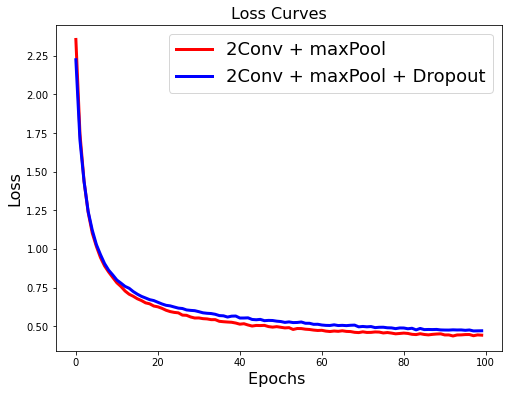

In [0]:
plt.figure(figsize=[8,6])
plt.plot(history1.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['loss'],'b',linewidth=3.0)
plt.legend(['2Conv + maxPool', '2Conv + maxPool + Dropout'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [0]:
history3 = subModel3.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
subModel3.evaluate(X_test, y_test)

Epoch 1/100
63/63 [==============================] - 20s 318ms/step - loss: 2.1514 - accuracy: 0.2338 - val_loss: 1.4964 - val_accuracy: 0.5937
Epoch 2/100
63/63 [==============================] - 20s 318ms/step - loss: 1.5459 - accuracy: 0.4894 - val_loss: 1.1378 - val_accuracy: 0.6469
Epoch 3/100
63/63 [==============================] - 20s 315ms/step - loss: 1.1722 - accuracy: 0.6230 - val_loss: 0.6718 - val_accuracy: 0.8039
Epoch 4/100
63/63 [==============================] - 20s 315ms/step - loss: 0.9624 - accuracy: 0.6950 - val_loss: 0.5483 - val_accuracy: 0.8407
Epoch 5/100
63/63 [==============================] - 20s 314ms/step - loss: 0.8221 - accuracy: 0.7404 - val_loss: 0.5162 - val_accuracy: 0.8405
Epoch 6/100
63/63 [==============================] - 20s 311ms/step - loss: 0.7278 - accuracy: 0.7725 - val_loss: 0.4184 - val_accuracy: 0.8811
Epoch 7/100
63/63 [==============================] - 20s 311ms/step - loss: 0.6478 - accuracy: 0.7969 - val_loss: 0.4019 - val_accuracy:

[0.24235467612743378, 0.9346573352813721]

In [12]:
history4 = subModel4.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
subModel4.evaluate(X_test, y_test)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
63/63 [==============================] - 17s 269ms/step - loss: 2.1982 - accuracy: 0.2082 - val_loss: 1.5927 - val_accuracy: 0.5246
Epoch 2/100
63/63 [==============================] - 17s 268ms/step - loss: 1.6286 - accuracy: 0.4519 - val_loss: 0.9474 - val_accuracy: 0.7246
Epoch 3/100
63/63 [==============================] - 17s 267ms/step - loss: 1.2574 - accuracy: 0.5917 - val_loss: 0.6874 - val_accuracy: 0.7948
Epoch 4/100
63/63 [==============================] - 17s 267ms/step - loss: 1.0603 - accuracy: 0.6597 - val_loss: 0.6749 - val_accuracy: 0.8094
Epoch 5/100
63/63 [==============================] - 17s 274ms/step - loss: 0.9327 - accuracy: 0.7006 - val_loss: 0.6259 - val_accuracy: 0.8311
Epoch 6/100
63/63 [==============================] - 17s 276ms/step - loss: 0.8246 - accuracy: 0.7386 - val_loss: 0.4798 - val_accuracy: 0.8574
Epoch 7/100
63/63 [==============================] - 18s 279

[0.19930511713027954, 0.948563277721405]

In [0]:
subModel4.save('/content/drive/My Drive/Colab Notebooks/A_Q3/Models/subModel4.h5')

Text(0.5, 1.0, 'Accuracy Curves')

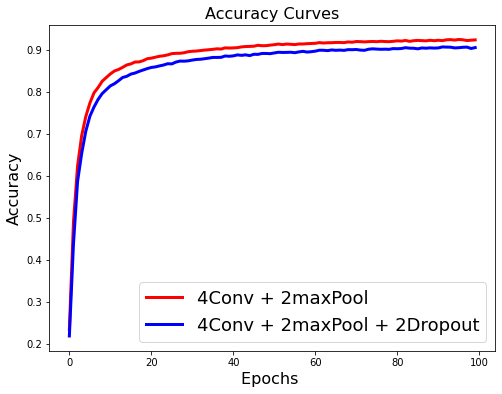

In [0]:
plt.figure(figsize=[8,6])
plt.plot(history3.history['accuracy'],'r',linewidth=3.0)
plt.plot(history4.history['accuracy'],'b',linewidth=3.0)
plt.legend(['4Conv + 2maxPool', '4Conv + 2maxPool + 2Dropout'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Text(0.5, 1.0, 'Loss Curves')

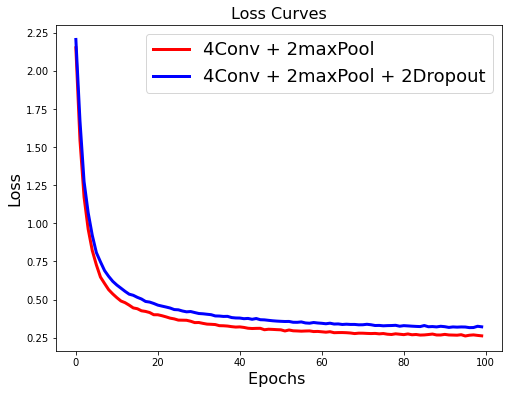

In [0]:
plt.figure(figsize=[8,6])
plt.plot(history3.history['loss'],'r',linewidth=3.0)
plt.plot(history4.history['loss'],'b',linewidth=3.0)
plt.legend(['4Conv + 2maxPool', '4Conv + 2maxPool + 2Dropout'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Copmparison of Model Accuracy with increasing number of layers

Text(0.5, 1.0, 'Accuracy Curves')

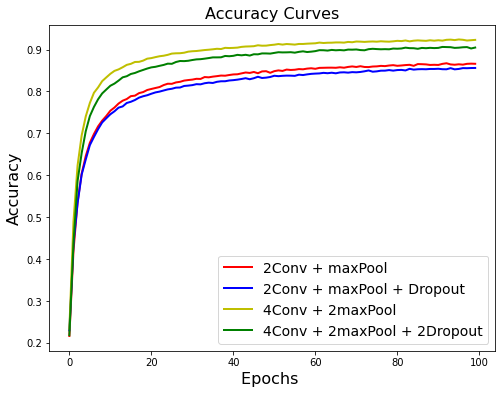

In [0]:
plt.figure(figsize=[8,6])
plt.plot(history1.history['accuracy'],'r',linewidth=2.0)
plt.plot(history2.history['accuracy'],'b',linewidth=2.0)
plt.plot(history3.history['accuracy'],'y',linewidth=2.0)
plt.plot(history4.history['accuracy'],'g',linewidth=2.0)
plt.legend(['2Conv + maxPool', '2Conv + maxPool + Dropout','4Conv + 2maxPool', '4Conv + 2maxPool + 2Dropout'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

The Accuracy of Model increased when used higher number of Layers.

# Effect of increasing rate of dropout on Accuracy

In [14]:
history5 = subModel5.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
subModel5.evaluate(X_test, y_test)

Epoch 1/100
63/63 [==============================] - 17s 272ms/step - loss: 2.2145 - accuracy: 0.2051 - val_loss: 1.7888 - val_accuracy: 0.4563
Epoch 2/100
63/63 [==============================] - 17s 271ms/step - loss: 1.8255 - accuracy: 0.3750 - val_loss: 1.1463 - val_accuracy: 0.6424
Epoch 3/100
63/63 [==============================] - 17s 274ms/step - loss: 1.4654 - accuracy: 0.5135 - val_loss: 0.8460 - val_accuracy: 0.7451
Epoch 4/100
63/63 [==============================] - 17s 274ms/step - loss: 1.2360 - accuracy: 0.5951 - val_loss: 0.7723 - val_accuracy: 0.7742
Epoch 5/100
63/63 [==============================] - 17s 270ms/step - loss: 1.0796 - accuracy: 0.6488 - val_loss: 0.5728 - val_accuracy: 0.8269
Epoch 6/100
63/63 [==============================] - 17s 270ms/step - loss: 0.9642 - accuracy: 0.6896 - val_loss: 0.5043 - val_accuracy: 0.8525
Epoch 7/100
63/63 [==============================] - 17s 271ms/step - loss: 0.8817 - accuracy: 0.7158 - val_loss: 0.5048 - val_accuracy:

[0.20741455256938934, 0.9449907541275024]

In [0]:
subModel5.save('/content/drive/My Drive/Colab Notebooks/A_Q3/Models/subModel5.h5')

In [16]:
history6 = subModel6.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
subModel6.evaluate(X_test, y_test)

Epoch 1/100
63/63 [==============================] - 18s 280ms/step - loss: 2.2557 - accuracy: 0.1818 - val_loss: 2.2055 - val_accuracy: 0.2015
Epoch 2/100
63/63 [==============================] - 17s 271ms/step - loss: 2.1105 - accuracy: 0.2419 - val_loss: 1.5182 - val_accuracy: 0.5680
Epoch 3/100
63/63 [==============================] - 17s 276ms/step - loss: 1.8447 - accuracy: 0.3575 - val_loss: 1.2556 - val_accuracy: 0.6197
Epoch 4/100
63/63 [==============================] - 17s 269ms/step - loss: 1.6702 - accuracy: 0.4294 - val_loss: 1.0090 - val_accuracy: 0.7058
Epoch 5/100
63/63 [==============================] - 17s 272ms/step - loss: 1.5132 - accuracy: 0.4887 - val_loss: 0.9446 - val_accuracy: 0.7201
Epoch 6/100
63/63 [==============================] - 17s 272ms/step - loss: 1.3725 - accuracy: 0.5411 - val_loss: 0.7647 - val_accuracy: 0.7805
Epoch 7/100
63/63 [==============================] - 17s 275ms/step - loss: 1.2791 - accuracy: 0.5759 - val_loss: 0.7414 - val_accuracy:

[0.29776933789253235, 0.9187154173851013]

In [0]:
subModel6.save('/content/drive/My Drive/Colab Notebooks/A_Q3/Models/subModel6.h5')

Text(0.5, 1.0, 'Accuracy Curves')

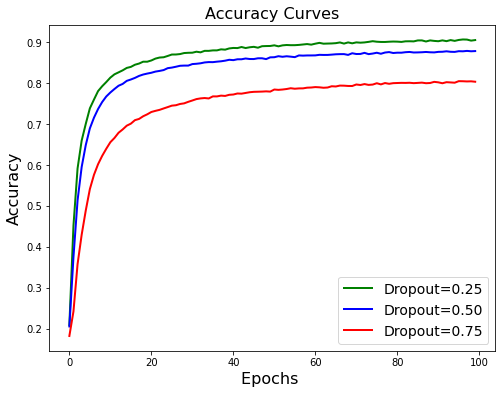

In [21]:
plt.figure(figsize=[8,6])
plt.plot(history4.history['accuracy'],'g',linewidth=2.0)
plt.plot(history5.history['accuracy'],'b',linewidth=2.0)
plt.plot(history6.history['accuracy'],'r',linewidth=2.0)
plt.legend(['Dropout=0.25', 'Dropout=0.50','Dropout=0.75'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# Main Model

-*# of Conv2D layers* ---> 6              
-*# of MaxPooling2D*  ---> 3     
-*# of Dropouts*      ---> 3(25%)+1(50%)  
-*filter size*        ---> (3,3)   
-*Acrivation*         ---> 'relu'   
-*total Parameters*   ---> 275,562

In [0]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

In [0]:
model1 = createModel()
batch_size = 1024
epochs = 100
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [0]:
datagen = ImageDataGenerator(
#         zoom_range=0.2, # randomly zoom into images
        rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

# Train

*Maximum Accuracy* ----> 91.46%    
*Maximum Validation Acc* ---> 94.06%    
*Test Accuracy* ----> 94.06% 

In [0]:
history = model1.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
# history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
#                    validation_data=(test_data, test_labels_one_hot))
model1.evaluate(X_test, y_test)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
63/63 [==============================] - 22s 342ms/step - loss: 2.2427 - accuracy: 0.1835 - val_loss: 2.1661 - val_accuracy: 0.2371
Epoch 2/100
63/63 [==============================] - 22s 341ms/step - loss: 2.0012 - accuracy: 0.2975 - val_loss: 1.2591 - val_accuracy: 0.6254
Epoch 3/100
63/63 [==============================] - 21s 341ms/step - loss: 1.5320 - accuracy: 0.4800 - val_loss: 0.9984 - val_accuracy: 0.6755
Epoch 4/100
63/63 [==============================] - 22s 345ms/step - loss: 1.2077 - accuracy: 0.6034 - val_loss: 0.6549 - val_accuracy: 0.8065
Epoch 5/100
63/63 [==============================] - 22s 343ms/step - loss: 1.0186 - accuracy: 0.6705 - val_loss: 0.7324 - val_accuracy: 0.7961
Epoch 6/100
63/63 [==============================] - 22s 343ms/step - loss: 0.8926 - accuracy: 0.7139 - val_loss: 0.5211 - val_accuracy: 0.8377
Epoch 7/100
63/63 [==============================] - 22s 342

[0.20747675001621246, 0.9406499862670898]

In [0]:
y_test_pred = model1.predict(X_test).argmax(axis=1)
y_test_pred

array([5, 2, 1, ..., 7, 6, 7])

**Curves**

Text(0.5, 1.0, 'Loss Curves')

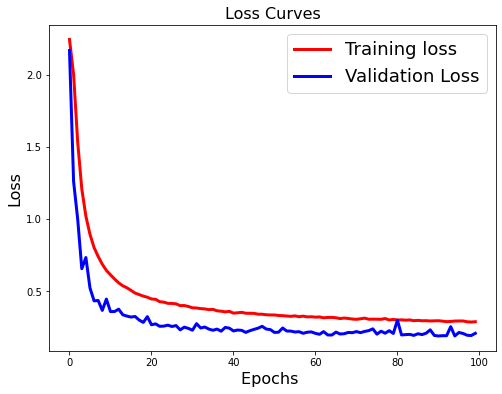

In [0]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

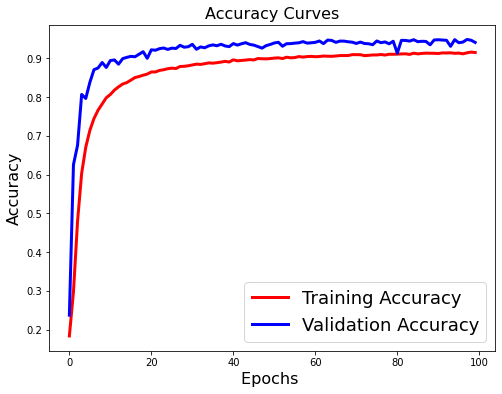

In [0]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# **Save model**

In [0]:
model1.save('/content/drive/My Drive/Colab Notebooks/A_Q3/model1.h5')